In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np

#from configurations.load_data_down_GSE63347 import load_data_down_GSE63347_cpg_horvath
#from configurations.config_down_GSE63347_cpg_horvath import config

from transform_data import *

from graphs_aux import *
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import textwrap
import scipy.stats as stats
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

from infrastructure.configuration import param
import matplotlib.pylab as pylab
import seaborn
seaborn.set_style('darkgrid', {'legend.frameon':True})
fontsize = 70
params = {'legend.fontsize': fontsize,
  'figure.figsize': (18, 15),
 'axes.labelsize': fontsize,
 'axes.titlesize':fontsize,
 'xtick.labelsize':fontsize,
 'ytick.labelsize':fontsize}
pylab.rcParams.update(params)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.style.use('ggplot')
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
#X, y, _, genes_names = load_data_mongoloids()
#X, y, _, genes_names = load_data_down_GSE63347()
#X, y, _, genes_names = load_data_cancer()
#X, y, _, cpgs_names = load_data_mongoloids_hannum_cpgs()
#X, y, _, cpgs_names = load_data_mongoloids_horvath_cpgs()

from configurations.current_config import get_config, get_data

config = get_config()
X, y, y_mask, cpgs_names, age = get_data()
#X, y, _, genes_names = get_data()


Data loaded:  33.712770800000726
float32 (816979, 48)
(48, 426293)
(48, 426293) 250254 (48,) (426293,)


In [5]:
patients_info = pd.read_csv(config.ifname("patients_info"), sep = '\t')


In [4]:
from load_parenclitics import load_parenclitics
parenclitics = load_parenclitics(config, by_sample = True, id_thr = 5)

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
parenclitics = parenclitics.select_dtypes(include=numerics)

In [9]:
1

1

In [ ]:
data = parenclitics.values
for feature in parenclitics:
    cur = parenclitics[feature]


In [ ]:
def get_id(name):
    return np.asscalar(np.argwhere(genes_names == name))


In [ ]:
print np.argsort(age)

In [ ]:
bins = np.linspace(14, 94, 17)
groups = []
for i in range(len(bins) - 1):
    if i + 1 < len(bins) - 1:
        ids = np.flatnonzero((bins[i] <= age) & (age < bins[i + 1]))
    else:
        ids = np.flatnonzero(bins[i] <= age)
    groups.append(ids)
    
print groups

id: 0
id: 10000
id: 20000
id: 30000
0.44235132606333827 0.455157075418394 cg04875128


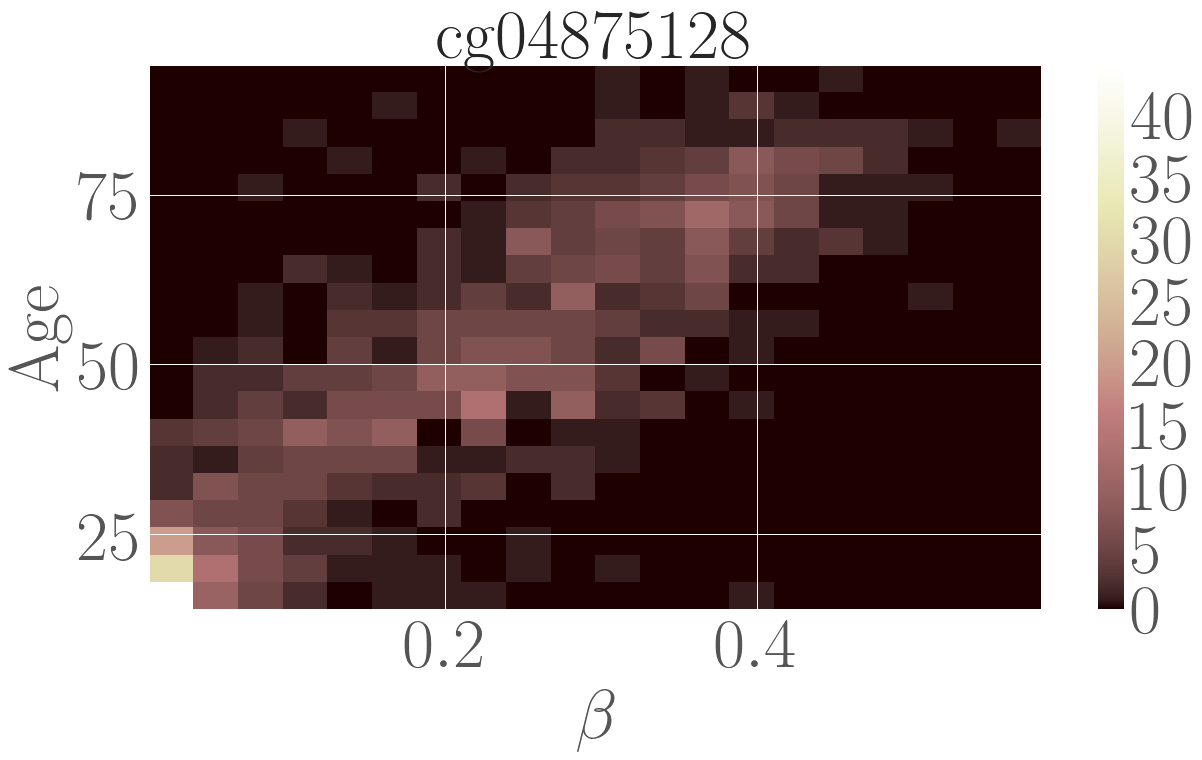

id: 40000
0.44235132606333827 0.36669087924212873 cg06639320


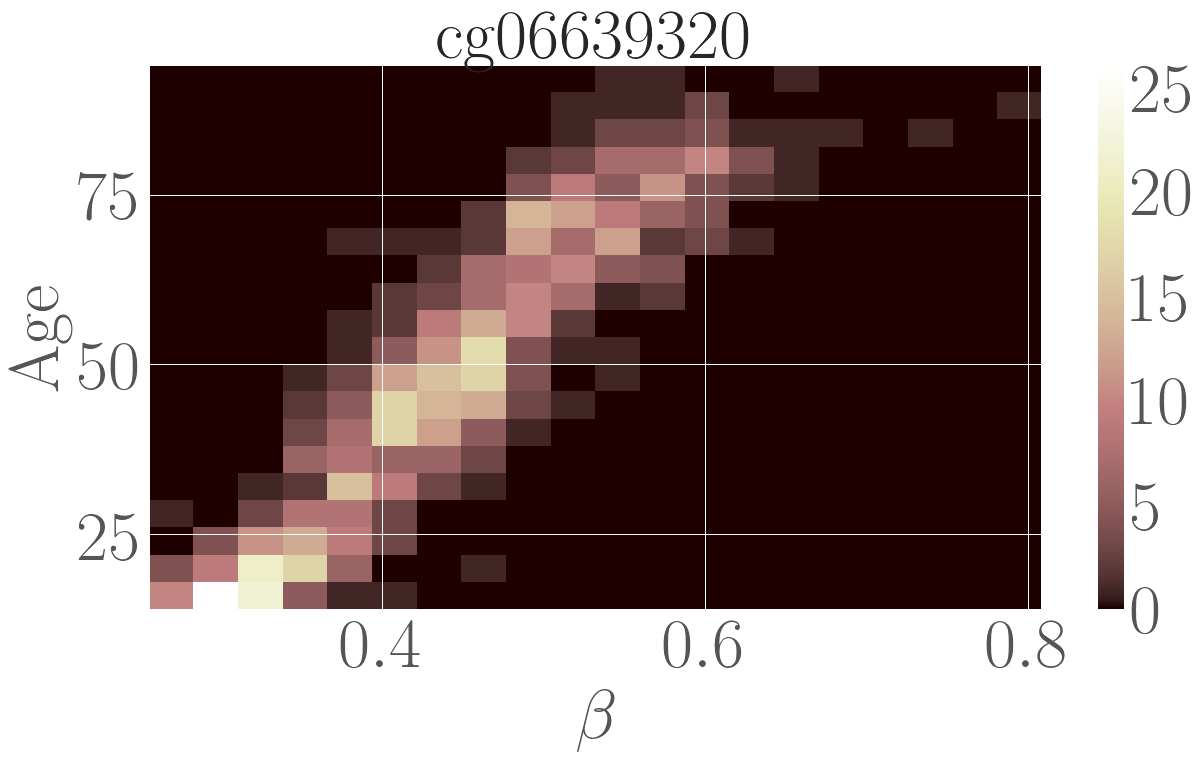

0.44235132606333827 0.44953456590805757 cg07553761


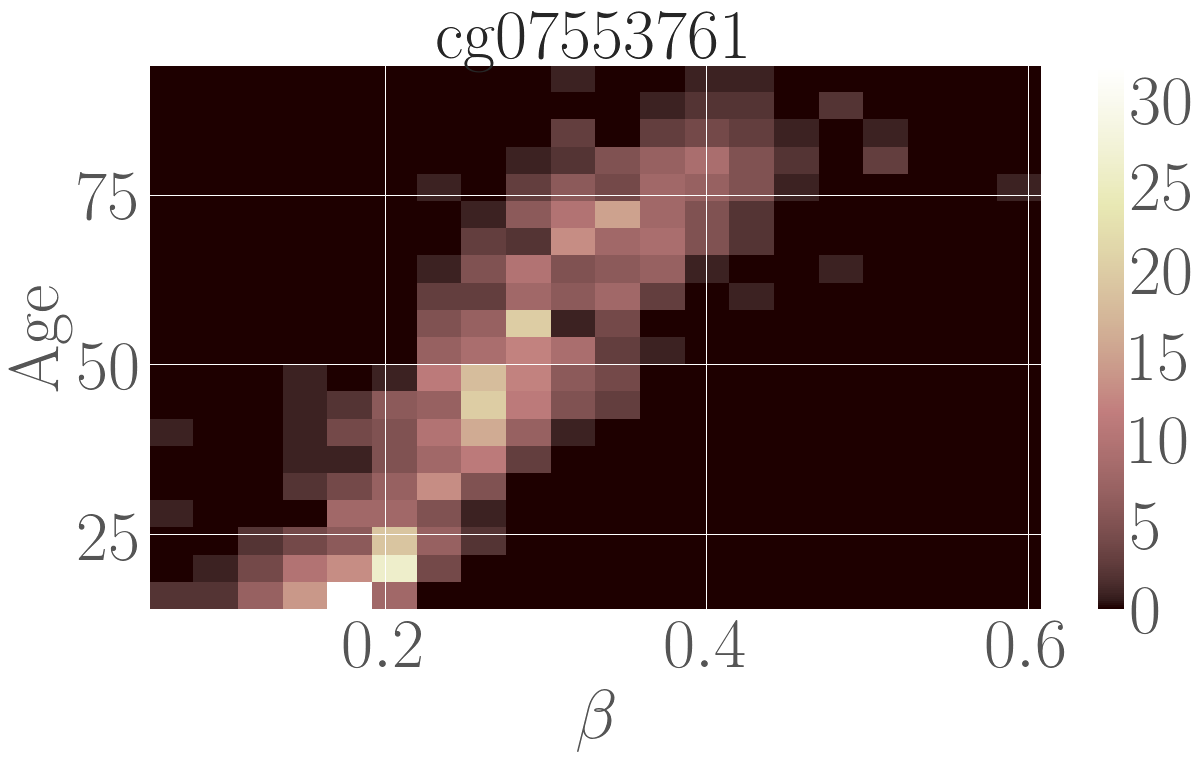

id: 50000
id: 60000
id: 70000
0.44235132606333827 0.4974419191988574 cg11970349


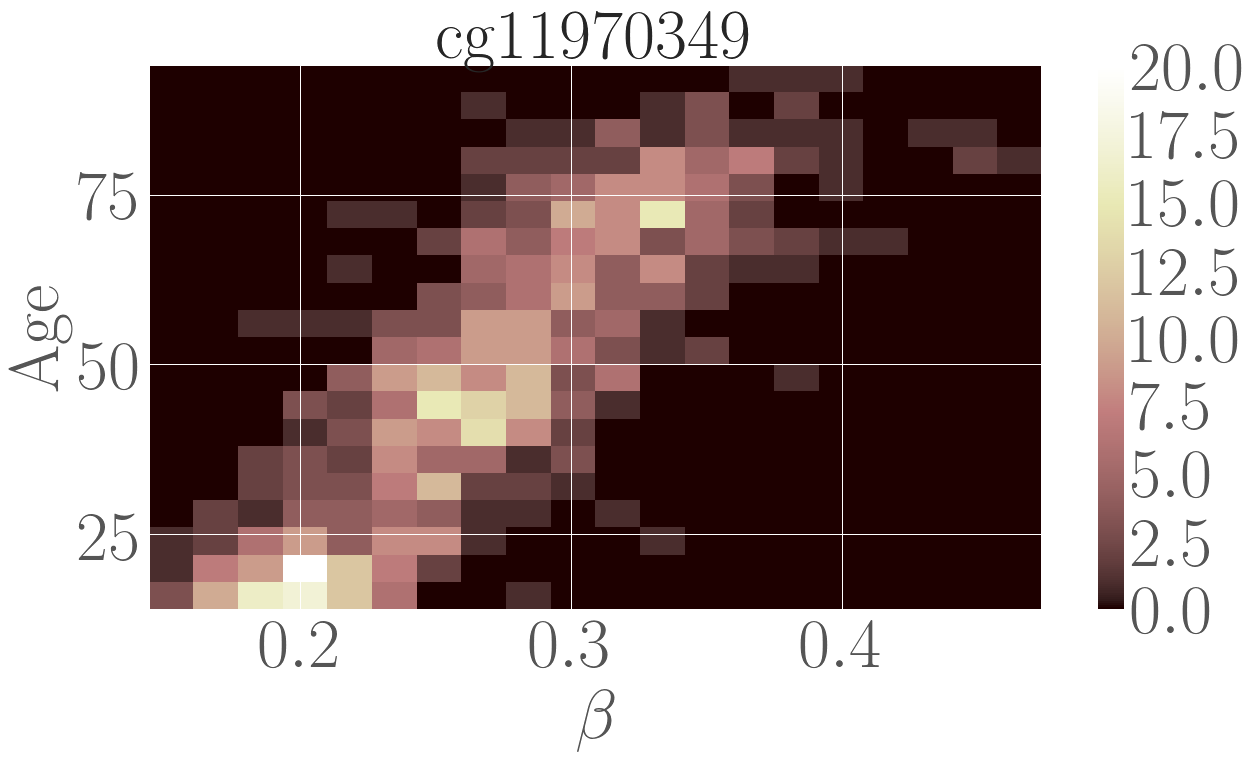

0.44235132606333827 0.47131537707007953 cg12934382


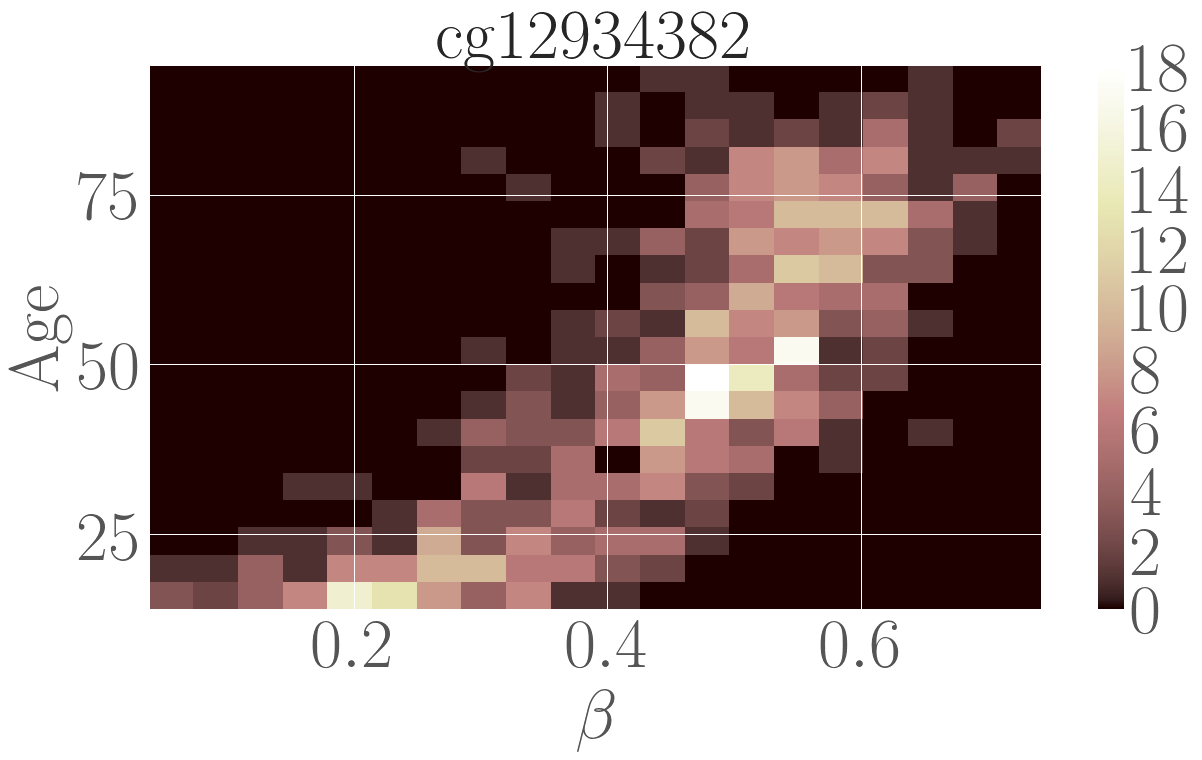

id: 80000
0.44235132606333827 0.4565099790843337 cg14023453


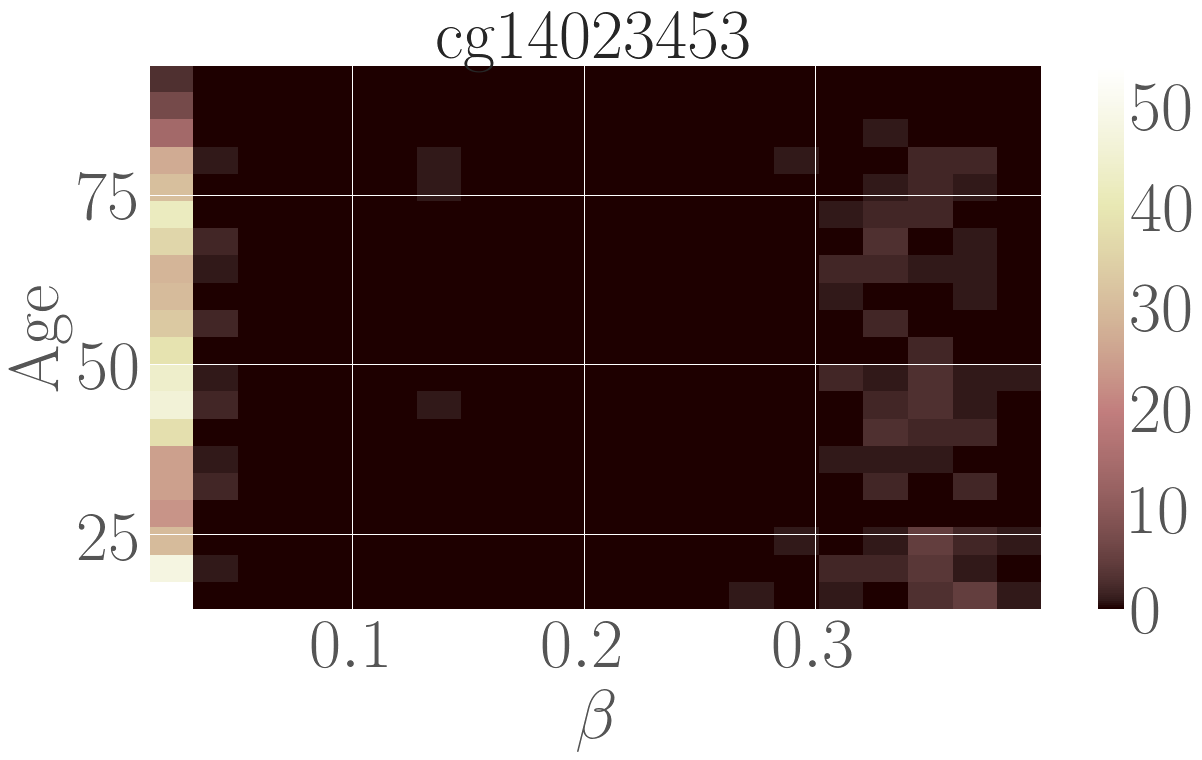

0.44235132606333827 0.4598417924663181 cg14361627


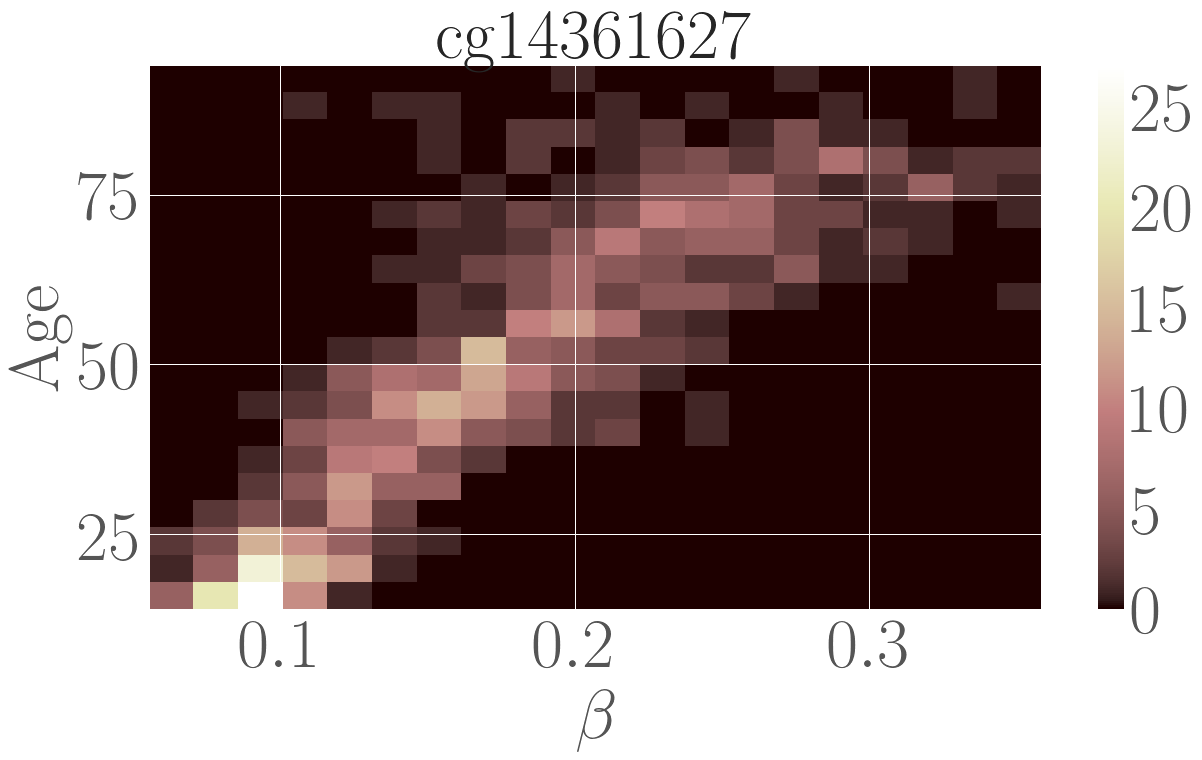

0.44235132606333827 0.46802751730422804 cg14498674


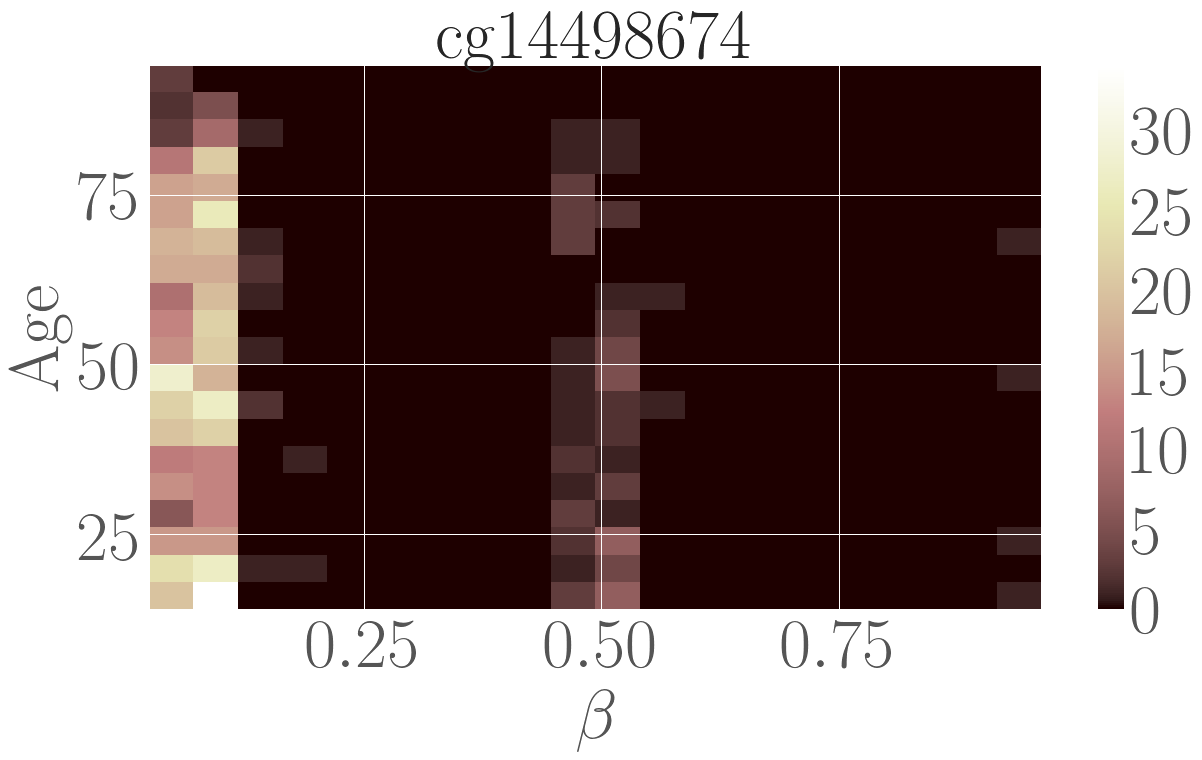

0.44235132606333827 0.4660262122335481 cg14556683


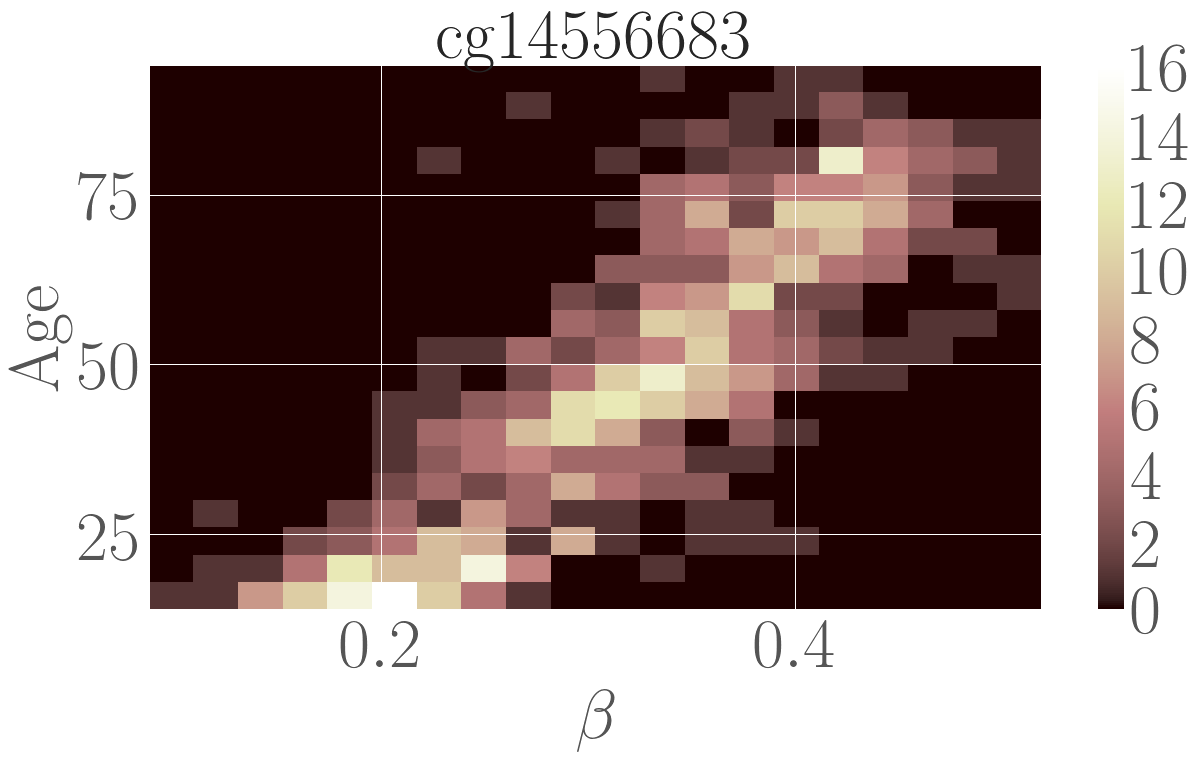

id: 90000
0.44235132606333827 0.3078917544467413 cg16867657


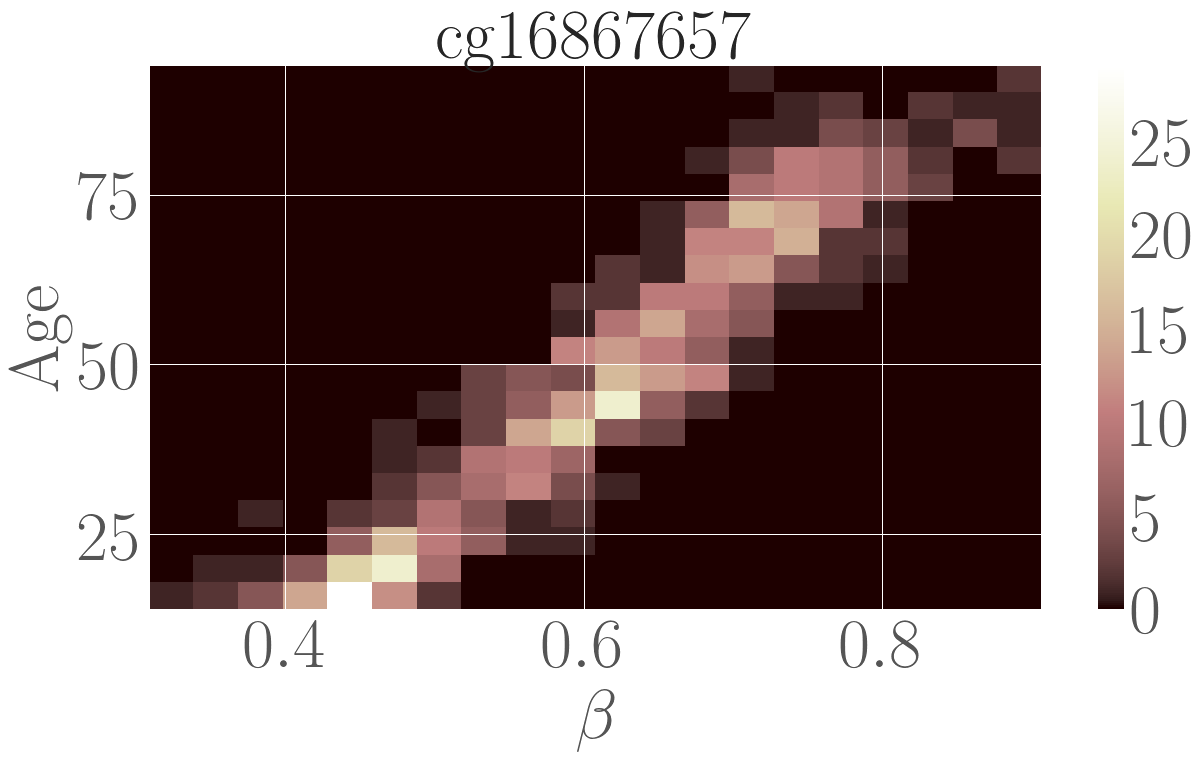

id: 100000
id: 110000
0.44235132606333827 0.48603745994651704 cg20273670


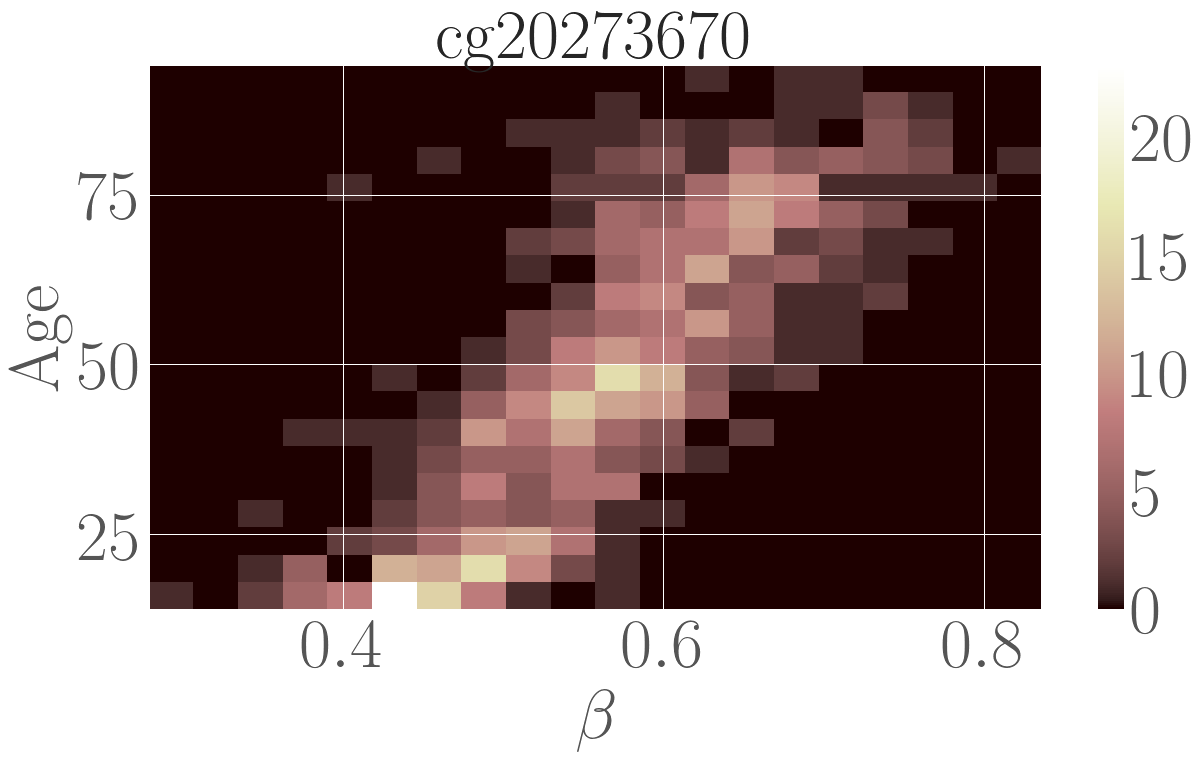

id: 120000
0.44235132606333827 0.4336053772122612 cg21572722


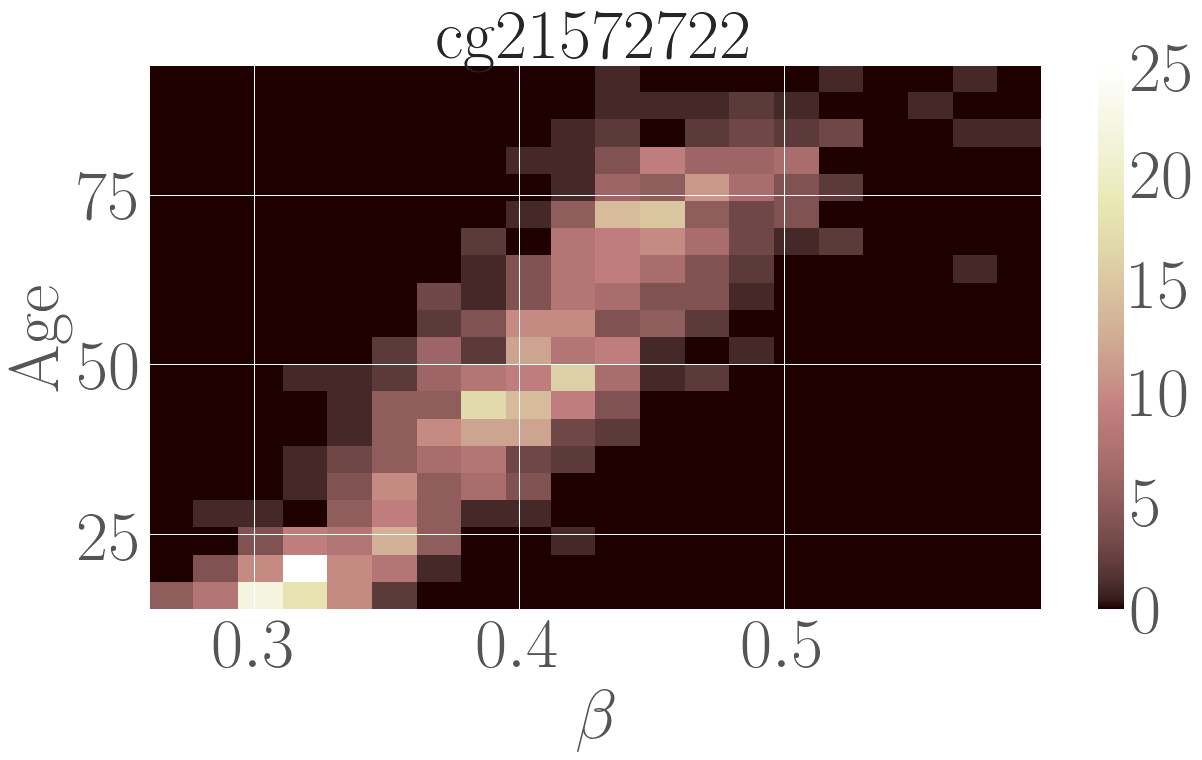

0.44235132606333827 0.36079349471979266 cg22454769


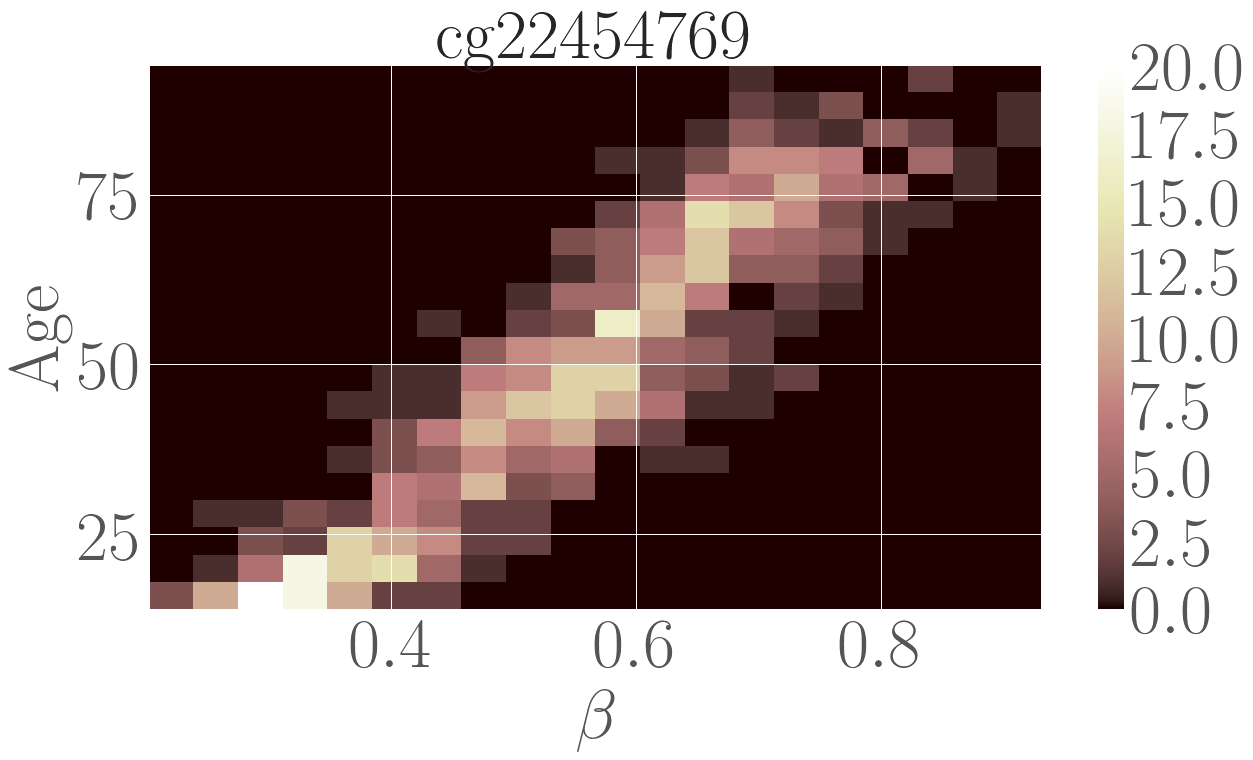

0.44235132606333827 0.48416162883311425 cg22736354


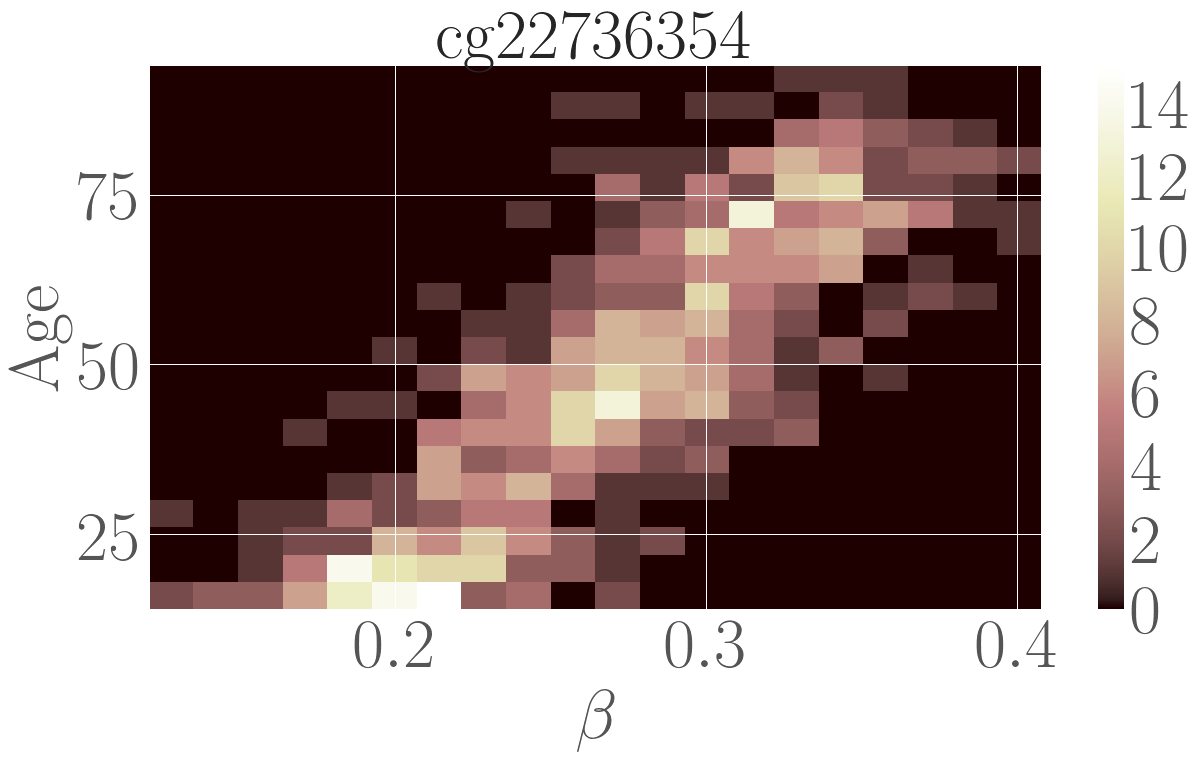

0.44235132606333827 0.4478503601270926 cg22968622


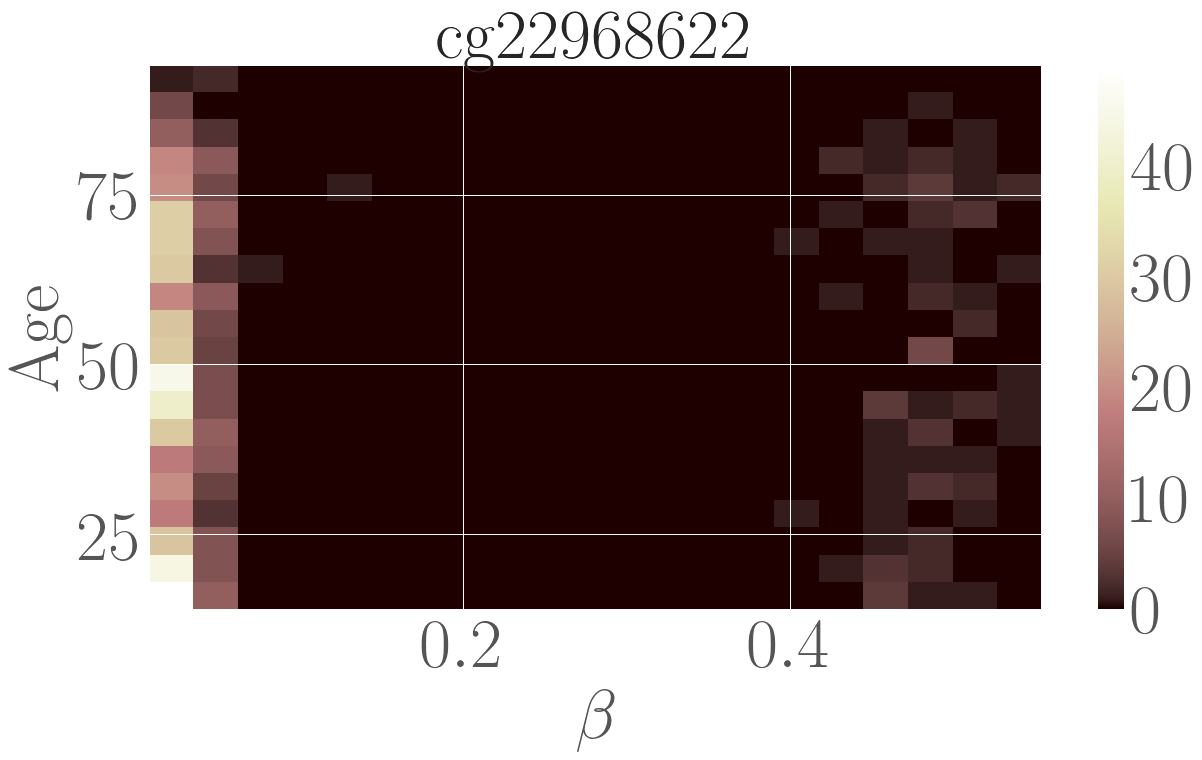

id: 130000
0.44235132606333827 0.4312372015708358 cg24079702


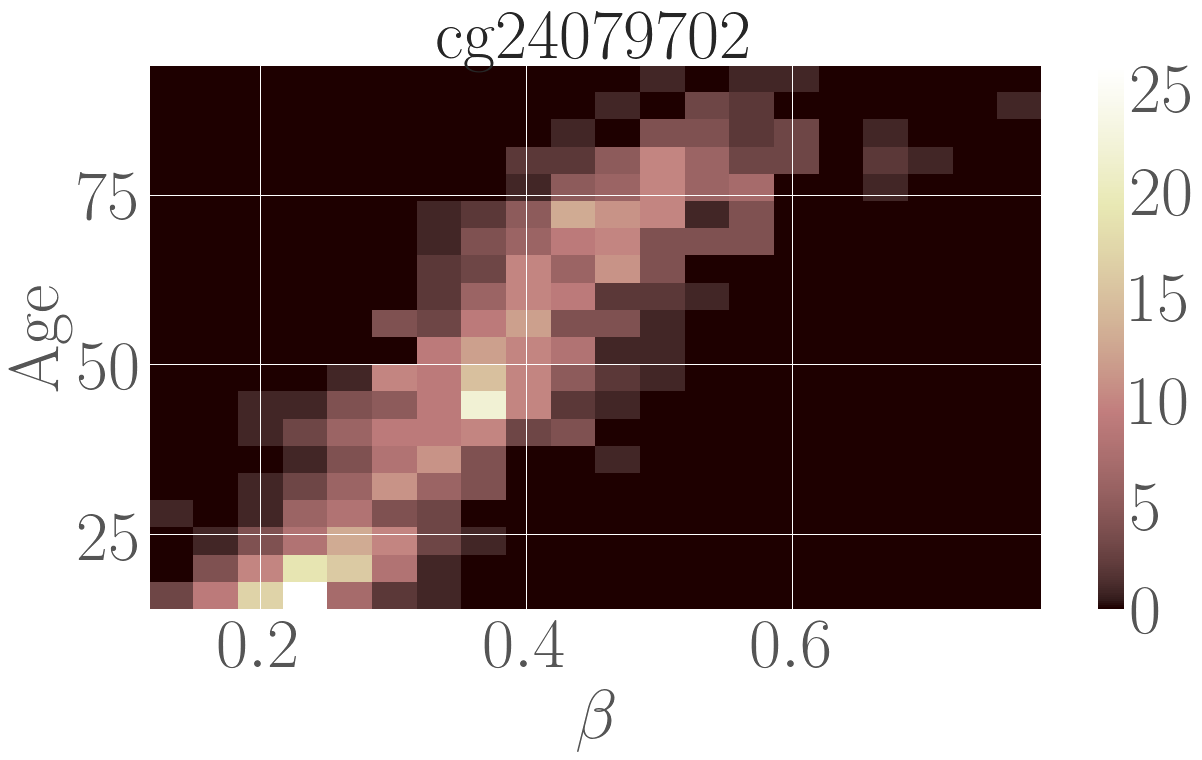

0.44235132606333827 0.46764187381722483 cg24724428


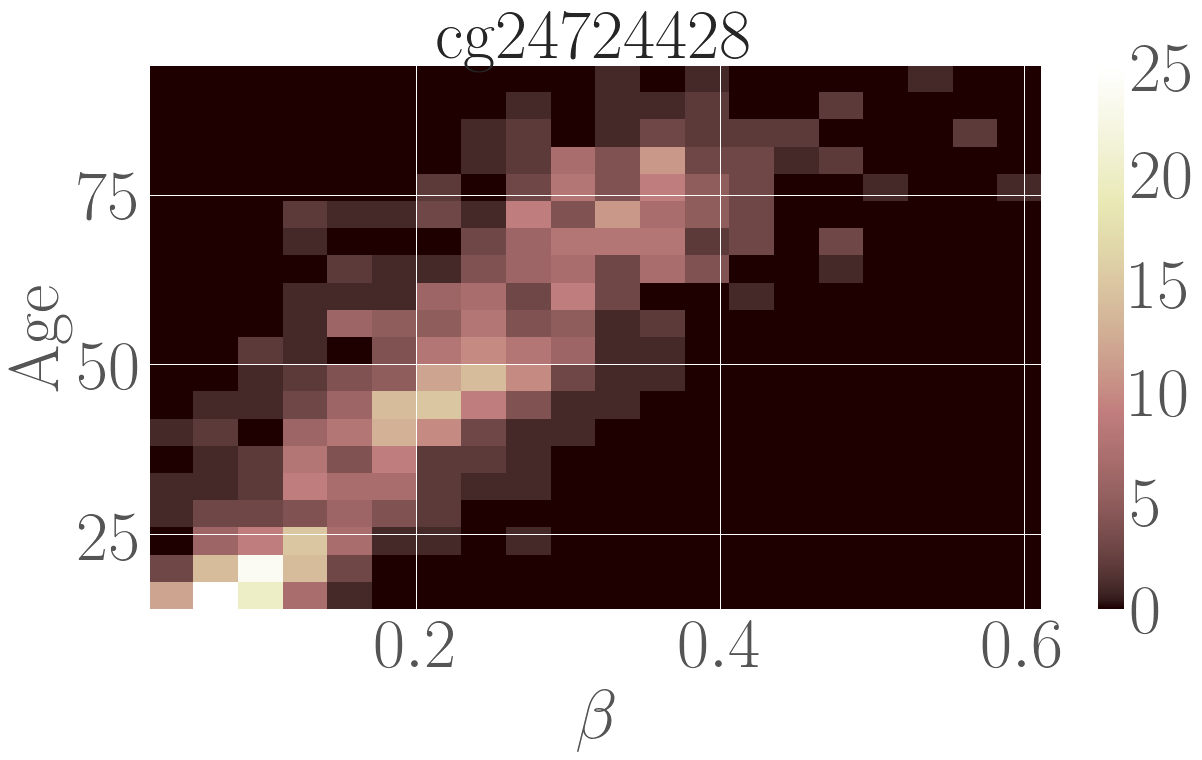

id: 140000
id: 150000


In [121]:
good_list = ["cg22454769", "cg16867657", "cg22454769", "cg06639320", "cg21572722", "cg24079702"]
_, indices, _ = np.intersect1d(genes_names, good_list, return_indices=True)
for i in range(X.shape[1]): # indices:
    x = X[:, i]
    
    means = np.zeros(len(groups))
    stds = np.zeros(len(groups))
    
    for j, group in enumerate(groups):
        #means[j] = np.mean(x[group])
        #stds[j] = np.std(x[group])
        
        means[j] = np.quantile(x[group], 0.5)
        stds[j] = (np.quantile(x[group], 0.9) - np.quantile(x[group], 0.1)) / 2
    
    if i % 10000 == 0:
        print 'id:', i
    
    cstd = (np.quantile(x, 0.9) - np.quantile(x, 0.1)) / 2
    
    #dfm = np.abs(np.diff(means)) / np.maximum(stds[:-1], stds[1:]) #  / np.std(x) #
    val = np.mean(stds) / cstd
    if val < 0.5:#np.abs(np.mean(dfm)) > 0:
        print np.mean(dfm), val, genes_names[i]
        
        fig = plt.figure(figsize=(20,10))
        plt.hist2d(x, age, cmap='pink', bins = 20)
        plt.errorbar((bins[:-1] + bins[1:]) / 2, means, yerr = stds, color = 'red')
        plt.colorbar()
        plt.title(genes_names[i], fontsize = fontsize)
        plt.ylabel(r'Age', fontsize = fontsize)
        plt.xlabel(r'$\beta$', fontsize = fontsize)
        plt.show()

In [ ]:
import time
while True:
    fig = plt.figure(figsize=(20,10))
    plt.hist2d(age, X[:,np.random.randint(X.shape[1])], cmap='pink', bins = 20)
    plt.colorbar()
    plt.show()
    time.sleep(3)
    plt.close()

In [6]:
cpgs_names  = np.genfromtxt("F:\Transfer\Out\cpg_beta.txt", dtype='str', usecols = 0)


In [14]:
print cpgs_names.shape
np.savez_compressed('F:\PC\UNN\Scientific\Gerontology\data\GSE87571\cpgs_names.npz', cpgs_names = cpgs_names)

(485512L,)


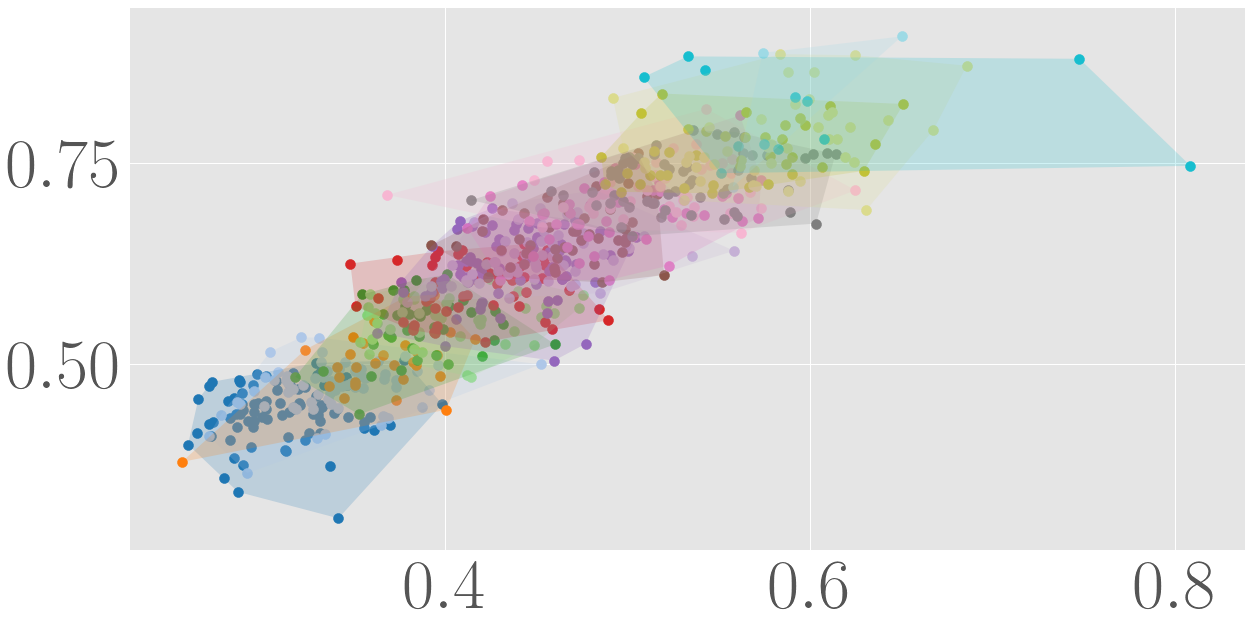

In [120]:
%matplotlib inline

id1 = get_id("cg06639320")
id2 = get_id("cg16867657")

colors = plt.cm.tab20(np.linspace(0,1,len(groups)))
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
for id_group, group in enumerate(groups):
    u = X[group, id1]
    v = X[group, id2]
    w = age[group]

    
    ax.scatter(u, v, s= 100, color=colors[id_group])
    from scipy.spatial import ConvexHull
    from matplotlib.patches import Polygon

    points = np.array([u, v]).T
    hull = ConvexHull(points)

    #ax.plot(points[:,0], points[:,1], 'o')
    cent = np.mean(points, 0)
    pts = []
    for pt in points[hull.simplices]:
        pts.append(pt[0].tolist())
        pts.append(pt[1].tolist())

    pts.sort(key=lambda p: np.arctan2(p[1] - cent[1],
                                    p[0] - cent[0]))
    pts = pts[0::2]  # Deleting duplicates
    pts.insert(len(pts), pts[0])
    k = 1
    color = 'green'
    poly = Polygon(k*(np.array(pts)- cent) + cent,
                   facecolor=colors[id_group], alpha=0.2)
    poly.set_capstyle('round')
    ax.add_patch(poly)
    
    #break
plt.show()

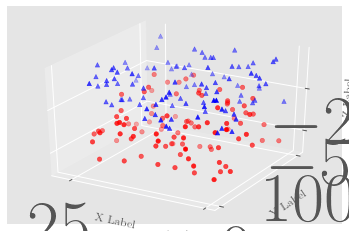

In [72]:
# These lines are comments
# Initial setup from an online python notebook tutorial is below. 
# Note the first line "%matplotlib inline" this is how the tutorial has it.
# Two solutions 1. use: "%matplotlib notebook" graphs appear dynamic in the notebook.
#               2. use: "%matplotlib" (only) graphs appear dynamic in separate window. 
#    ( 2. is the best solution for detailed graphs/plots. )

%matplotlib inline  
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#pd.set_option('html',False)
#pd.set_option('max_columns',30)
#pd.set_option('max_rows',10)


# What follows is a copy of the 3D plot example code.
# Data is randomly generated so there is no external data import.

def randrange(n, vmin, vmax):
    return (vmax-vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -60, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 50)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zl, zh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
u = get_id("cg06639320")
v = get_id("cg16867657")

from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
clf = SVC(gamma='auto')
xu = X[groups[4], u]
xv = X[groups[4], v]

xu = (xu - xu.mean()) / xu.std()
xv = (xv - xv.mean()) / xv.std()
data = np.array([xu, xv]).T
clf.fit(data, y)
# Plotting decision regions
fig, ax = plt.subplots()
# Decision region for feature 3 = 1.5
value = 1.5
# Plot training sample with feature 3 = 1.5 +/- 0.75
width = 0.75

ax.plot()

plot_decision_regions(data, y, clf=clf,
                      filler_feature_values={2: value},
                      filler_feature_ranges={2: width},
                      legend=2, ax=ax)

In [9]:
from annotations.cpgs import cpgs_annotation
cpgs = cpgs_annotation(config.ifname('cpgs_annotations'))

KeyError: 'cpgs_annotations'

In [13]:
df = cpgs.get_sub_frame({'gene_out': [np.NaN], 'cpgs_in': cpgs_names, 'geotype_in': ['Island', 'N_Shore', 'S_Shore']})


In [14]:
genes = df['UCSC_REFGENE_NAME'].values
from collections import defaultdict
genes_ids = defaultdict(list)
for i, x in enumerate(genes):
    if type(x) is set:
        for y in x:
            genes_ids[y].append(i)
    else:
        genes_ids[x].append(i)
        
print len(genes_ids)

15605


In [16]:
Xg = np.zeros((X.shape[0], len(genes_ids)), np.float32)
genes_names = []
i = 0
for gene, ids in genes_ids.iteritems():
    Xg[:, i] = X[:, ids].mean(axis = 1)
    genes_names.append(gene)
    i = i + 1
genes_names = np.array(genes_names)
print Xg.shape, len(genes_names), Xg.dtype

(729L, 15605L) 15605 float32


In [42]:
Xt = X[:, df.index.values]

[     0      1      2 ... 485492 485503 485506]


In [79]:
print X.shape, cpgs_names.shape, len(genes_names), df.index.values[-1]

(729L, 485512L) (485512L,) 21227 485359


In [63]:
print type(genes_names)
for gene, ids in genes_names.iteritems():
    print ids
    break

<type 'collections.defaultdict'>
[15578, 18426, 63374, 69417, 90203, 107126, 123766, 126313, 137143, 184940, 204301, 205737, 245449, 276147, 278222, 293354, 299657, 318955, 319018, 328448, 336959]


In [17]:
np.savez_compressed('beta_genes_mean.npz', X = Xg, genes_names = genes_names)

In [82]:
print df

                 ID_REF CHR        MAPINFO  Probe_SNPs Probe_SNPs_10  \
0            cg00000029  16   [53468112.0]       [nan]         [nan]   
5            cg00000289  14   [69341139.0]       [nan]         [nan]   
6            cg00000292  16   [28890100.0]  rs62037371         [nan]   
7            cg00000321   8   [41167802.0]       [nan]         [nan]   
9            cg00000622  15   [23034447.0]       [nan]         [nan]   
10           cg00000658   9  [139997924.0]       [nan]         [nan]   
11           cg00000714  19   [54695678.0]       [nan]         [nan]   
13           cg00000734   3  [128902377.0]       [nan]         [nan]   
14           cg00000769  12  [124086477.0]       [nan]         [nan]   
15           cg00000807   2   [23913414.0]       [nan]         [nan]   
18           cg00000924  11    [2720463.0]  rs78369463         [nan]   
20           cg00000957   1    [5937253.0]   rs3747991    rs77973802   
21           cg00001099   8   [87081553.0]       [nan]         [

[14. 29. 47. 66. 94.] [  0.  20.  40.  60.  80. 100.] 182.25 [15. 18. 19. 28.]


(array([179., 177., 189., 184.]),
 array([14., 29., 47., 66., 94.]),
 <a list of 4 Patch objects>)

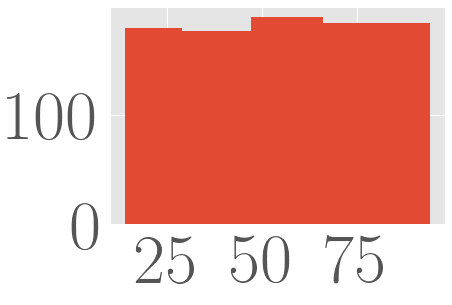

In [129]:
bins = np.percentile(age, np.linspace(0, 100, 5))
#bins = np.linspace(age.min(), age.max(), 4)
print bins, np.linspace(0, 100, 6), len(age) / 4.0, np.diff(bins)
#bins = np.linspace(age.min(), age.max(), age.max() - age.min() + 1)

plt.hist(age, bins = bins)

In [23]:
u = 1
v = 2
G, D = make_genes_edge_svc(X[:, u], X[:, v], y, y_mask, 0.9, True)
print G.shape, D.shape, G.dtype
G, D = make_genes_edge_svc(X[:, u], X[:, v], y, y_mask, 0.9, False)
print G.shape, D.shape, G.dtype

(1L, 729L) (729L,) bool
(1L, 729L) (729L,) bool


In [36]:
bins = np.percentile(age, np.linspace(0, 100, 4 + 1))
y = np.minimum(np.digitize(age, bins), 4) - 1
print y
print X.dtype

[3 2 0 3 3 3 0 1 1 1 3 0 2 2 2 2 3 2 2 2 1 3 0 0 3 0 3 2 1 2 3 1 3 1 3 2 3
 0 2 3 3 3 2 2 2 2 2 1 3 3 3 0 2 1 1 0 1 3 0 3 0 0 0 0 0 3 2 3 1 1 3 1 1 0
 0 0 1 1 3 1 0 0 0 0 0 0 0 0 0 0 3 1 1 2 1 1 0 1 0 1 1 1 1 3 3 3 3 1 2 2 1
 2 2 3 3 2 0 3 2 2 0 0 0 0 2 1 2 2 3 2 3 2 1 0 1 3 2 0 3 2 1 2 2 0 3 2 3 0
 3 2 1 1 3 1 2 0 0 0 0 0 0 3 3 3 1 0 2 3 1 0 0 1 1 2 3 2 3 2 1 1 1 1 3 3 2
 3 3 2 3 3 3 3 0 3 2 3 1 1 2 3 1 1 1 0 1 0 2 0 1 2 1 1 3 2 1 0 1 2 0 1 3 3
 2 3 1 2 2 3 2 0 3 2 1 0 1 0 0 3 2 2 3 0 2 0 2 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 3 3 3 3 1 2 0 1 1 3 2 2 0 1 0 0 2 0 2 0 0 1 2 2 2 1 2 2 3 0 0 0 3 0 1 1 0
 2 0 0 1 2 2 0 2 1 0 0 0 0 1 0 2 1 0 2 1 2 0 3 3 2 1 1 3 3 3 3 2 2 0 1 1 0
 2 3 1 1 2 2 2 1 2 0 3 1 1 1 2 1 2 1 2 1 3 3 1 3 0 2 2 1 3 1 3 1 2 0 2 2 0
 1 3 2 3 1 3 3 0 3 2 1 2 2 2 3 3 0 2 0 1 2 3 3 1 2 1 3 3 2 2 1 0 3 3 0 0 3
 1 2 3 1 0 1 3 3 2 0 0 3 1 0 0 0 0 1 1 1 0 3 3 3 3 1 1 1 1 2 2 2 3 2 2 2 0
 1 2 3 2 0 2 0 0 0 2 2 2 0 1 0 2 3 2 0 2 0 2 0 3 2 1 0 3 3 2 3 2 1 1 2 2 1
 1 0 3 1 2 1 3 1 2 2 0 0 